# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
print("Training data shape", X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Training data shape (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


After one hot encoding: (60000, 10) (10000, 10)


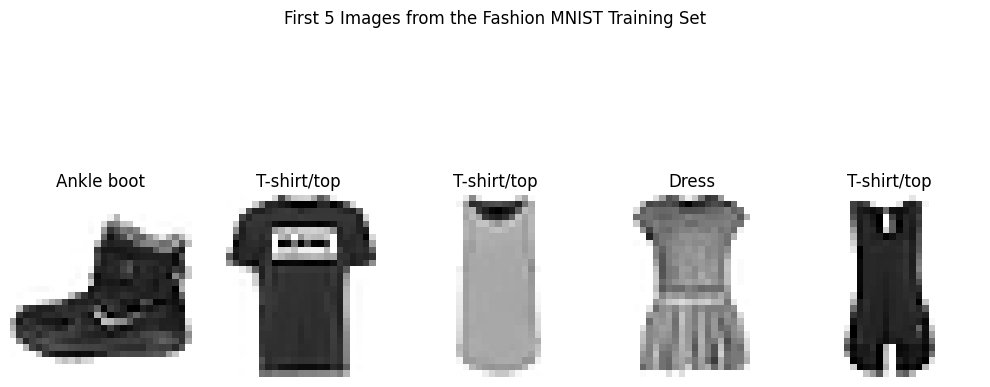

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
print('After one hot encoding:', y_train.shape, y_test.shape)
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Display the image
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # Set the title with the corresponding class name
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')

plt.suptitle("First 5 Images from the Fashion MNIST Training Set", y=1.02)
plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**The pictures are blurry which could be a problem for us and the T-shirt/top images are note clear, this could impace the classification**

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))
# Compile the model using `model.compile()`
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model with `model.fit()`
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test loss is: ", test_loss)
print("Test accuracy is: ", test_accuracy)

Epoch 1/10


c:\Users\israi\anaconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7334 - loss: 0.8148 - val_accuracy: 0.8224 - val_loss: 0.5194
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8365 - loss: 0.4851 - val_accuracy: 0.8432 - val_loss: 0.4547
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8478 - loss: 0.4417 - val_accuracy: 0.8460 - val_loss: 0.4421
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8540 - loss: 0.4209 - val_accuracy: 0.8313 - val_loss: 0.4791
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8538 - loss: 0.4241 - val_accuracy: 0.8536 - val_loss: 0.4277
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8601 - loss: 0.4067 - val_accuracy: 0.8537 - val_loss: 0.4235
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0.4132 - val_accuracy: 0.8542 - val_loss: 0.4204
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8589 - loss: 0.3958 - val_accurac

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**The accuracy is actually good its around 84%. I didn't expect it to be this good. I think the performance is at this level because of the dataset itself being structured properly and it has 784 features and the number of samples is around 60000**

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [8]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test loss is: ", test_loss)
print("Test accuracy is: ", test_accuracy)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8031 - loss: 0.5583 - val_accuracy: 0.8708 - val_loss: 0.3627
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8919 - loss: 0.3072 - val_accuracy: 0.8898 - val_loss: 0.3157
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9058 - loss: 0.2592 - val_accuracy: 0.8957 - val_loss: 0.2956
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9182 - loss: 0.2265 - val_accuracy: 0.8884 - val_loss: 0.3184
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9272 - loss: 0.2035 - val_accuracy: 0.8996 - val_loss: 0.2930
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9364 - loss: 0.1808 - val_accuracy: 0.9016 - val_loss: 0.2986
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9414 - loss: 0.1635 - val_accuracy: 0.9005 - val_loss: 0.2967
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9482 - loss: 0.1488 - 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**The CNN model gave an accuracy of 90% which is around 6% more than the baseline model. CNN performs better because it learns complex features e.g. edges, corners and it automatically discovers optimal features that are then used for the prediction. This is why it is better than a simple linear regression model**

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [14]:
# A. Test Hyperparameters
# B. Test presence or absence of regularization
from tensorflow.keras import backend as k
from keras.layers import MaxPooling2D, Dropout

filters_list = [16, 32, 64, 128]
dropout_list = [0.0, 0.5, 0.6]  
results = []
for filters in filters_list:
    for drop in dropout_list: 
        k.clear_session()
        model = Sequential()
        model.add(Conv2D(filters, (3,3), activation='relu', input_shape=(28,28,1)))
        model.add(MaxPooling2D((2,2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        if drop > 0:
            model.add(Dropout(drop))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        print('Model filters:', filters, 'Dropout:', drop)
        model_history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print('After evaluation, test loss', test_loss, 'test accuarcy', test_acc)
        results.append({ 'filters': filters, 'dropout': drop, 'test_loss': test_loss, 'test_accuracy': test_acc })

print('Results summary: ')
for r in results:
    print('Filters:', r['filters'], 'Dropout', r['dropout'], 'Test Accuracy', r['test_accuracy'], 'Test Loss:', r['test_loss'])

Model filters: 16 Dropout: 0.0
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7784 - loss: 0.6509 - val_accuracy: 0.8752 - val_loss: 0.3561
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8794 - loss: 0.3365 - val_accuracy: 0.8932 - val_loss: 0.3063
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8995 - loss: 0.2810 - val_accuracy: 0.8997 - val_loss: 0.2863
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9111 - loss: 0.2489 - val_accuracy: 0.8962 - val_loss: 0.2823
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9200 - loss: 0.2204 - val_accuracy: 0.9057 - val_loss: 0.2676
After evaluation, test loss 0.28168144822120667 test accuarcy 0.8992000222206116
Model filters: 16 Dropout: 0.5
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.7380 - loss: 0.7536 - val_accuracy: 0.8728 - val_loss: 0.3552
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8667 - loss: 0.38

In [18]:
# Visualizing the results
import pandas as pd
from IPython.display import display

results_df = pd.DataFrame(results)
results_df.sort_values(by=['test_accuracy'], ascending=False, inplace = True)
results_df.reset_index(drop=True, inplace=True)
display(results_df)

,filters,dropout,test_loss,test_accuracy
0,128,0.0,0.252600,0.9118
1,32,0.0,0.264911,0.9048
2,32,0.5,0.267643,0.9028
3,64,0.5,0.269367,0.9023
4,64,0.0,0.290220,0.9017
5,64,0.6,0.273391,0.9005
6,128,0.5,0.270798,0.8999
7,16,0.0,0.281681,0.8992
8,16,0.5,0.277820,0.8989
9,16,0.6,0.283892,0.8986


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**What I noticed is that the dropout regularization was not a good option to try out because it gave worse results with the dropout than without it. Another thing I noticed was the higher filters gave better results because it gives the model more respresentational capacity filter 128 with no dropout had the highest accuracy of 91% as opposed to filter 128 with dropout 0.6 which had 89% accuracy. The difference is trivial but it is still noticable.**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [22]:
model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('After evaluation, test loss', test_loss, 'test accuarcy', test_acc)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8037 - loss: 0.5438 - val_accuracy: 0.8931 - val_loss: 0.3000
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9047 - loss: 0.2633 - val_accuracy: 0.9002 - val_loss: 0.2775
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9217 - loss: 0.2121 - val_accuracy: 0.9013 - val_loss: 0.2767
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9367 - loss: 0.1776 - val_accuracy: 0.9079 - val_loss: 0.2588
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.9460 - loss: 0.1493 - val_accuracy: 0.9146 - val_loss: 0.2469
After evaluation, test loss 0.26135435700416565 test accuarcy 0.9093999862670898


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**The accuracy is just a bit better than the CNN and base model. The reason I got better results is that I did parameter optimization and hyperparameter tunning and this is an important concept that is usually applied in deep learning, as in deep learning most of the time we are dealing with a black box not knowing what's happening behind that box, when we try out different parameters and compare them we give ourselves an insight to that box and we understand what could work better and why. If I had more time I would try adding more layers and trying other regularization techniques and adding more epochs**

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.